Importing the Dependencies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [2]:
# loading th dataset to pandas DataFrame
df=pd.read_csv('/content/drive/MyDrive/Project/Wine Quality/winequality-red.csv')

In [3]:
# number of rows & columns 
df.shape

(1599, 12)

In [4]:
# first  rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visulaization

In [6]:
# statistical measure of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='count'>

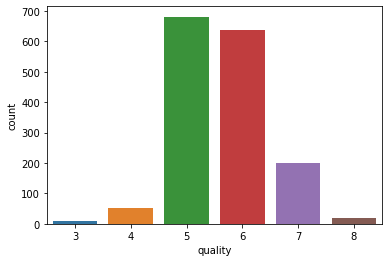

In [7]:
# number of values for each quality
sns.countplot(x='quality',data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

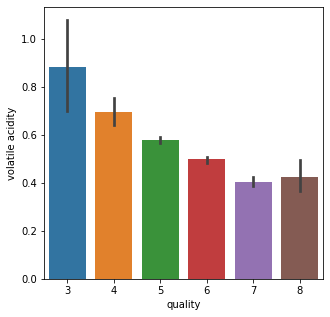

In [8]:
# volatile acidity VS Quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality' ,y='volatile acidity' ,data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

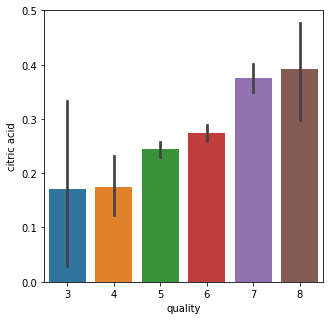

In [9]:
# Crtric acid VS quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df)

Correlation

1. Positive Correlation
2. Negative Correlation

<AxesSubplot:>

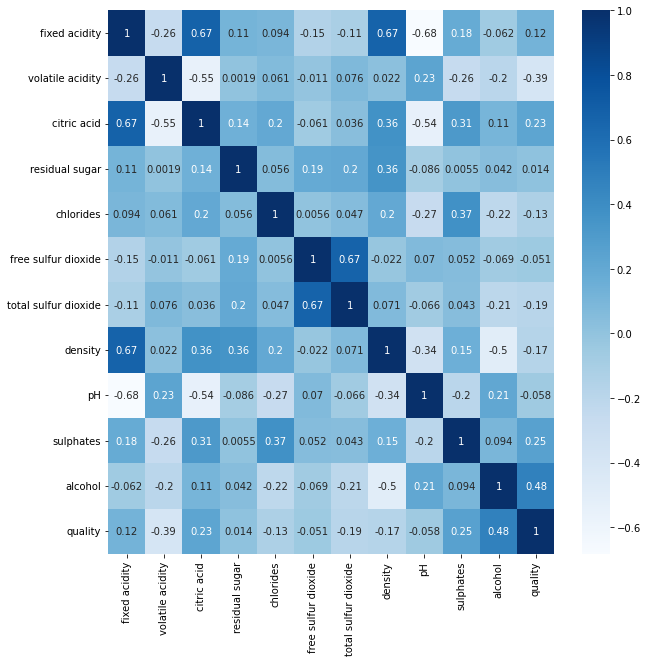

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Data Preprocessing

In [11]:
# sperating the data and label
x=df.iloc[:,:-1].values


Label Binarizaton

In [12]:
# 2 label values ( bad <7 , good >=7)
y=df['quality'].apply (lambda y_value:1 if y_value>=7 else 0)

Train & Test Split

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Model Training:

Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [15]:
rf.fit(x_train,y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [16]:
# accuracy on test data
from sklearn.metrics import accuracy_score
y_test_pred=rf.predict(x_test)
test_accuracy=accuracy_score(y_test_pred,y_test)
print ("Acuuracy = ",test_accuracy)

Acuuracy =  0.903125


Building a Predictive System

In [20]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

input=np.asarray(input_data).reshape(1,-1)

predication=rf.predict(input)

print (predication)

if predication==1:
  print ('Good Wine Quality')
else :
  print ('Bad Quality Wine')

[0]
Bad Quality Wine
